In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [139]:
df=pd.read_csv(r"C:\Users\admin\Downloads\archive (3)\diabetes_dataset.csv")
df.head()

,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,...,41,160,145,136,236,6.36,8.18,29.6,Type 2,1
1,48,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,...,55,50,30,93,150,2.00,5.63,23.0,No Diabetes,0
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,6.4,...,66,99,36,118,195,5.07,7.51,44.7,Type 2,1
3,74,Female,Black,Highschool,Low,Retired,Never,0,49,3.4,...,50,79,140,139,253,5.28,9.03,38.2,Type 2,1
4,46,Male,White,Graduate,Middle,Retired,Never,1,109,7.2,...,52,125,160,137,184,12.74,7.20,23.5,Type 2,1


In [140]:
df.isnull().sum()

age                                   0
gender                                0
ethnicity                             0
education_level                       0
income_level                          0
employment_status                     0
smoking_status                        0
alcohol_consumption_per_week          0
physical_activity_minutes_per_week    0
diet_score                            0
sleep_hours_per_day                   0
screen_time_hours_per_day             0
family_history_diabetes               0
hypertension_history                  0
cardiovascular_history                0
bmi                                   0
waist_to_hip_ratio                    0
systolic_bp                           0
diastolic_bp                          0
heart_rate                            0
cholesterol_total                     0
hdl_cholesterol                       0
ldl_cholesterol                       0
triglycerides                         0
glucose_fasting                       0


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   age                                 100000 non-null  int64  
 1   gender                              100000 non-null  object 
 2   ethnicity                           100000 non-null  object 
 3   education_level                     100000 non-null  object 
 4   income_level                        100000 non-null  object 
 5   employment_status                   100000 non-null  object 
 6   smoking_status                      100000 non-null  object 
 7   alcohol_consumption_per_week        100000 non-null  int64  
 8   physical_activity_minutes_per_week  100000 non-null  int64  
 9   diet_score                          100000 non-null  float64
 10  sleep_hours_per_day                 100000 non-null  float64
 11  screen_time_hours_per_day  

In [142]:
df.shape


(100000, 31)

In [143]:
df.describe

<bound method NDFrame.describe of        age  gender ethnicity education_level  income_level employment_status  \
0       58    Male     Asian      Highschool  Lower-Middle          Employed   
1       48  Female     White      Highschool        Middle          Employed   
2       60    Male  Hispanic      Highschool        Middle        Unemployed   
3       74  Female     Black      Highschool           Low           Retired   
4       46    Male     White        Graduate        Middle           Retired   
...    ...     ...       ...             ...           ...               ...   
99995   46    Male     Other        Graduate  Upper-Middle        Unemployed   
99996   41  Female     White        Graduate        Middle          Employed   
99997   57  Female     Black       No formal  Upper-Middle          Employed   
99998   47  Female     Black      Highschool  Lower-Middle           Retired   
99999   52  Female     White    Postgraduate        Middle          Employed   

     

In [144]:
X = df.drop("diagnosed_diabetes", axis=1)
y = df["diagnosed_diabetes"]

In [145]:
print(y)

0        1
1        0
2        1
3        1
4        1
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: diagnosed_diabetes, Length: 100000, dtype: int64


In [146]:
num_df = df.select_dtypes(include=['int64', 'float64'])


In [147]:
corr = num_df.corr()

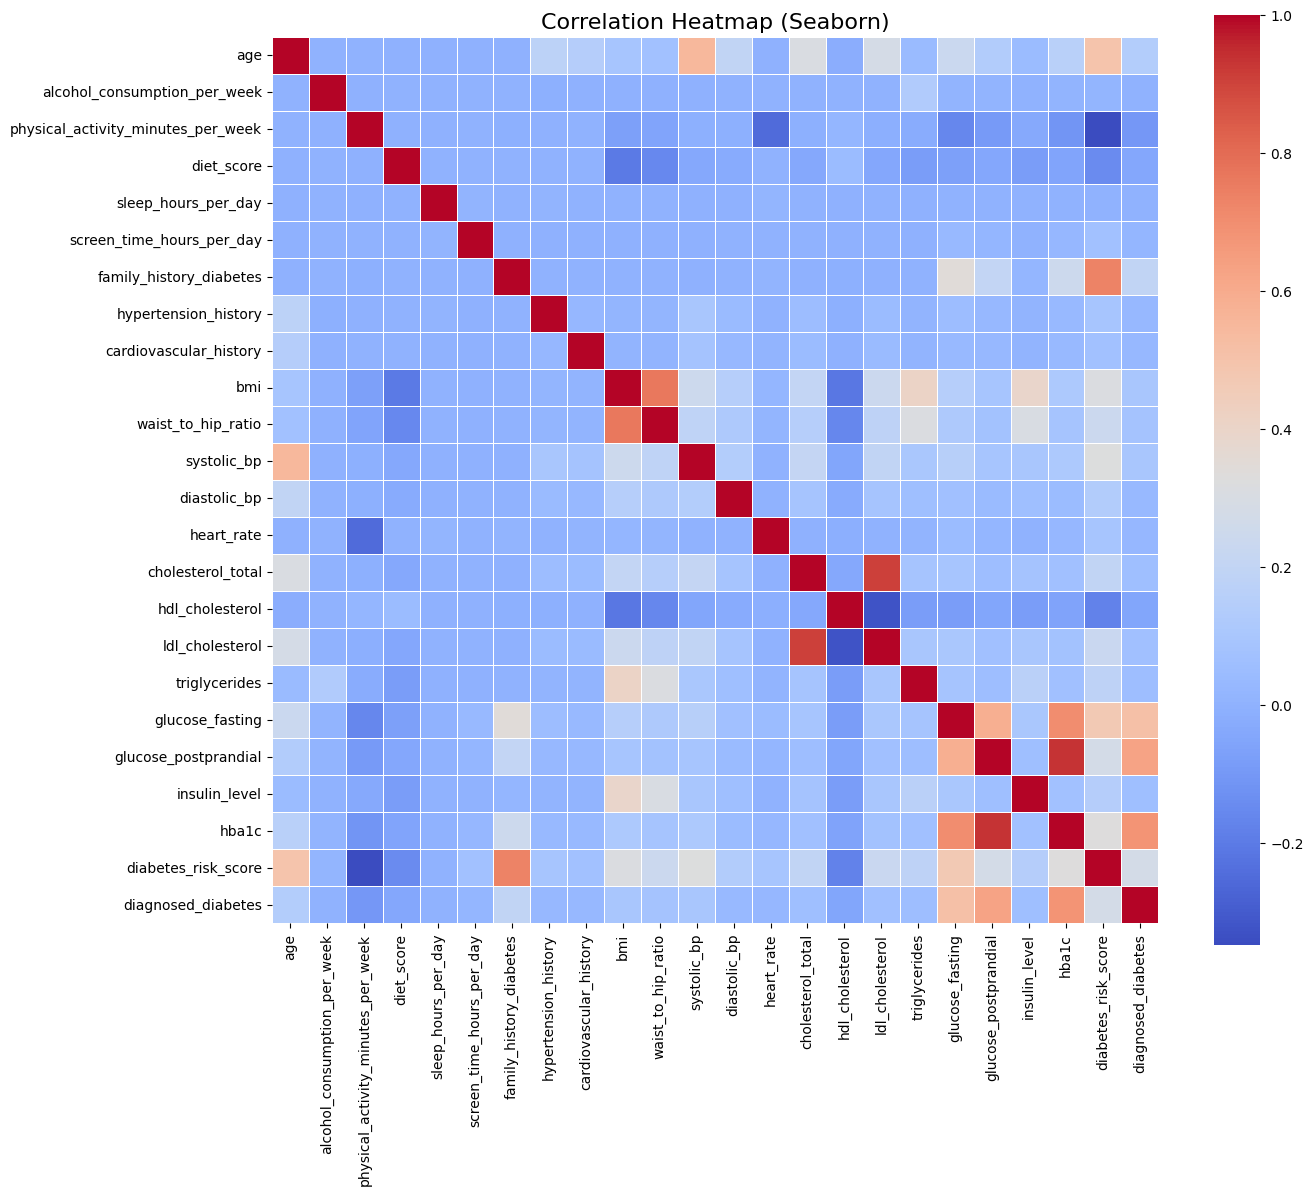

In [148]:
import seaborn as sns
plt.figure(figsize=(14, 12))
sns.heatmap(corr, annot=False, cmap="coolwarm", square=True, linewidths=0.5)

plt.title("Correlation Heatmap (Seaborn)", fontsize=16)
plt.tight_layout()
plt.show()

In [149]:
X = pd.get_dummies(X, drop_first=True)

In [150]:
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(score_func=f_classif, k=10)
selector.fit(X, y)


,score_func,<function f_c...00240205FF4C0>
,k,10


In [151]:
selected_feature_names = X.columns[selector.get_support()]

In [152]:
print(" Top 10 Selected Features Using SelectKBest:")
print(selected_feature_names)

 Top 10 Selected Features Using SelectKBest:
Index(['age', 'physical_activity_minutes_per_week', 'family_history_diabetes',
       'glucose_fasting', 'glucose_postprandial', 'hba1c',
       'diabetes_risk_score', 'diabetes_stage_No Diabetes',
       'diabetes_stage_Pre-Diabetes', 'diabetes_stage_Type 2'],
      dtype='object')


In [153]:
scores = pd.DataFrame({
    "Feature": X.columns,
    "Score": selector.scores_
}).sort_values(by="Score", ascending=False)

In [154]:
print(scores)

                               Feature         Score
44               diabetes_stage_Type 2  1.067425e+07
42         diabetes_stage_Pre-Diabetes  2.342280e+05
21                               hba1c  8.572692e+04
19                glucose_postprandial  6.575058e+04
18                     glucose_fasting  3.532437e+04
41          diabetes_stage_No Diabetes  1.495376e+04
22                 diabetes_risk_score  8.329883e+03
6              family_history_diabetes  4.077110e+03
0                                  age  1.933124e+03
2   physical_activity_minutes_per_week  1.025935e+03
9                                  bmi  9.509470e+02
11                         systolic_bp  9.200224e+02
10                  waist_to_hip_ratio  6.266985e+02
16                     ldl_cholesterol  4.573562e+02
14                   cholesterol_total  3.395575e+02
20                       insulin_level  3.342138e+02
17                       triglycerides  3.171786e+02
15                     hdl_cholesterol  2.6311

In [155]:
print(scores.head(20))

                               Feature         Score
44               diabetes_stage_Type 2  1.067425e+07
42         diabetes_stage_Pre-Diabetes  2.342280e+05
21                               hba1c  8.572692e+04
19                glucose_postprandial  6.575058e+04
18                     glucose_fasting  3.532437e+04
41          diabetes_stage_No Diabetes  1.495376e+04
22                 diabetes_risk_score  8.329883e+03
6              family_history_diabetes  4.077110e+03
0                                  age  1.933124e+03
2   physical_activity_minutes_per_week  1.025935e+03
9                                  bmi  9.509470e+02
11                         systolic_bp  9.200224e+02
10                  waist_to_hip_ratio  6.266985e+02
16                     ldl_cholesterol  4.573562e+02
14                   cholesterol_total  3.395575e+02
20                       insulin_level  3.342138e+02
17                       triglycerides  3.171786e+02
15                     hdl_cholesterol  2.6311

In [ ]:
from sklearn.ensemble import RandomForestClassifier
X_selected = X[selected_feature_names]
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [157]:
model= RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42
)


In [158]:
model.fit(X_train,y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [159]:
y_pred = model.predict(X_test)

In [160]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))

Accuracy : 0.99965
Precision: 1.0
Recall   : 0.9994128994380609
F1 Score : 0.9997063635219599


In [ ]:
importances = pd.Series(model.feature_importances_, index=selected_feature_names)
importances = importances.sort_values(ascending=False)

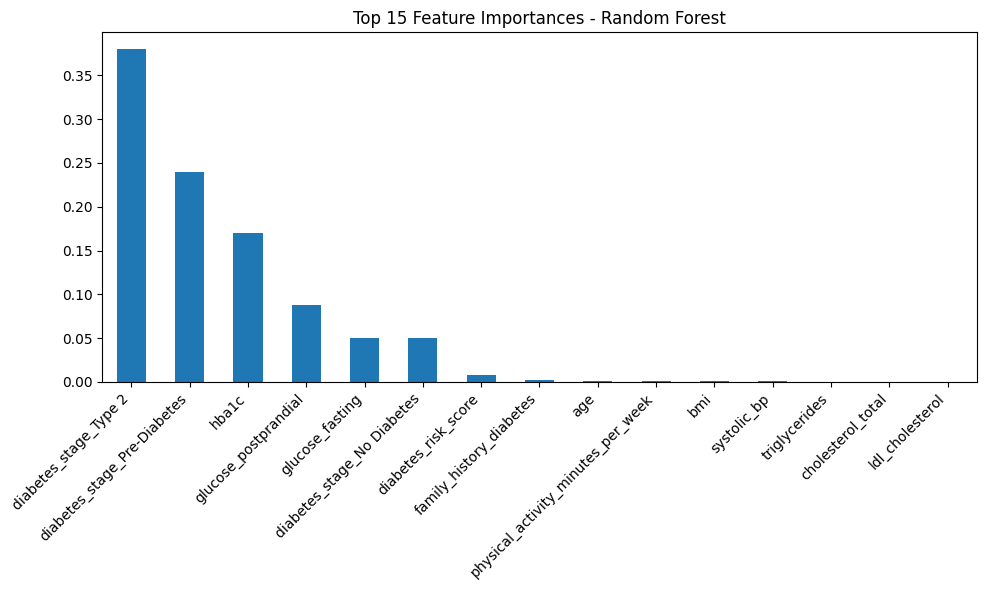

In [162]:
plt.figure(figsize=(10, 6))
importances.head(15).plot(kind='bar')
plt.title("Top 15 Feature Importances - Random Forest")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
import joblib
joblib.dump(model, r'C:\Users\admin\Downloads\archive (3)\diabetes_random_forest_model.pkl')
# Save selected feature names
with open(r'C:\Users\admin\Downloads\archive (3)\selected_features.txt', 'w') as f:
    for feat in selected_feature_names:
        f.write(feat + '\n')

['diabetes_random_forest_model.pkl']